In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.style.use('seaborn-white')  # 'seaborn-ticks'
sns.set_style('white')

from sklearn.preprocessing import StandardScaler

In [14]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile)
with open(r'..\data\metadata\extra color maps\metab_lipid_class_superclass_color.json', 'r') as infile:
    class_map = json.load(infile)

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic =     [1076, 1082, 1101]
impaired =     [1060, 1062, 1074, 1092, 1102]
normal =       [1091, 1093]
animal_tol = {
    1076: 'diabetic', 1082: 'diabetic', 1101: 'diabetic', 1060: 'impaired', 1062: 'impaired', 
    1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal'}
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='FBG|RBG').columns
fbg_cols = data.filter(regex='FBG').columns
rbg_cols = data.filter(regex='RBG').columns
pval_cols = data.filter(regex='pval').columns

n = data.filter(regex='1091|1093')                 # normal
i = data.filter(regex='1060|1062|1074|1092|1102')  # impaired
d = data.filter(regex='1076|1082|1101')            # diabetic

fasted = data[fbg_cols]  # fasted
randomfed = data[rbg_cols]  # random-fed

fn = n.filter(fbg_cols)  # fasted normal 
fi = i.filter(fbg_cols)  # fasted impaired
fd = d.filter(fbg_cols)  # fasted diabetic

rn = n.filter(rbg_cols)  # random normal
ri = i.filter(rbg_cols)  # random impaired
rd = d.filter(rbg_cols)  # random diabetic

rn.columns = rn.columns.str[:-4]
fn.columns = fn.columns.str[:-4]
ri.columns = ri.columns.str[:-4]
fi.columns = fi.columns.str[:-4]
rd.columns = rd.columns.str[:-4]
fd.columns = fd.columns.str[:-4]

q_samp = 'fdr corrected pval effect of sampling'
qval_sampling = data['fdr corrected pval effect of sampling']
# qval_sampling.replace(np.nan, 1, inplace=True)  # For replacing blanks (model failed to converge) with 1
qval_gtol = data['fdr corrected pval effect of glucose tolerance']
qval_cross = data['fdr corrected pval effect of interaction sampling and glucose tolerance']

In [4]:
def parse_lipid(lipid):
    l = lipid.split(' ')
    cls = l[0]
    fa = l[1]
    
    if '-' in fa:
        fa = fa.split('-')[1]
        label = fa.split('-')[0] + '-'
    else:
        label = ''
    if 'd' in fa:
        fa = fa.split('d')[1]
        label = fa.split('d')[0] + 'd'
    else:
        label = ''
        
    fa = [x.split(':') for x in fa.split('_')]
    fa = [[int(x) for x in sublist] for sublist in fa]
    carbons = sum([chain[0] for chain in fa])
    unsat = sum([chain[1] for chain in fa])
    result = cls + ' ' + label + str(carbons) + ':' + str(unsat)
#     print(lipid, result)
    return cls, label, carbons, unsat, fa

In [205]:
d = data[data_cols]
ids = data.loc[(data['Type'] == 'lipid') & (data['Proposed ID'] != 'unknown')]
ids.loc[:, 'fa_carbons'] = ids.loc[:, 'Proposed ID'].apply(lambda x: parse_lipid(x)[2])
ids.loc[:, 'fa_unsat'] = ids.loc[:, 'Proposed ID'].apply(lambda x: parse_lipid(x)[3])
ids['log2 FC'] = ids[rbg_cols].mean(axis=1) - ids[fbg_cols].mean(axis=1)
ids['-log10 p-value'] = -np.log10(ids[q_samp])
ids
# sig_samp = ids.loc[ids[q_samp] < 0.05]
# sig_samp

C:\Users\bjanderson23\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\bjanderson23\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bjanderson23\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Unique ID,Type,Proposed ID,Found in Tracefinder,Compound Class,m/z,RT [min],Area (Max.),Score,Adduct,...,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG,fa_carbons,fa_unsat,log2 FC,-log10 p-value
i,,,,,,,,,,,,,,,,,,,,,
l_59,LysoPC_20:5_542.32452_1.036,lipid,LysoPC 20:5,NaN,LysoPC,542.32452,1.036,27.240025,NaN,NaN,...,24.531729,24.893138,26.422086,26.375037,25.859763,25.688053,20,5,0.592306,2.053887
l_62,LysoPC_18:1_522.35236_1.137,lipid,LysoPC 18:1,NaN,LysoPC,522.35236,1.137,24.057255,NaN,NaN,...,21.926470,21.358820,22.732770,23.127453,22.839920,21.983506,18,1,1.225050,5.281371
l_66,LysoPC_22:5_570.35516_1.417,lipid,LysoPC 22:5,NaN,LysoPC,570.35516,1.417,23.297861,NaN,NaN,...,21.134994,21.414575,22.327534,22.236230,22.083478,21.822266,22,5,0.303001,0.640070
l_68,LysoPC_17:1_508.3407_1.452,lipid,LysoPC 17:1,NaN,LysoPC,508.34070,1.452,22.132391,NaN,NaN,...,19.977858,20.085441,21.011768,20.645696,21.202782,21.098831,17,1,1.139800,8.548862
l_69,LysoPC_16:0_496.34018_1.489,lipid,LysoPC 16:0,NaN,LysoPC,496.34018,1.489,29.720795,NaN,NaN,...,25.657907,27.999821,27.908307,27.707524,28.304917,27.936891,16,0,0.303205,0.450942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_1015,TG_57:2_946.88043_19.582,lipid,TG 57:2,NaN,TG,946.88043,19.582,22.430427,NaN,NaN,...,18.438757,18.380746,19.429230,15.554904,18.636955,18.058207,57,2,0.454954,2.105844
l_1017,TG_56:1_934.88123_19.841,lipid,TG 56:1,NaN,TG,934.88123,19.841,24.103360,NaN,NaN,...,19.977209,18.951939,20.671684,18.786307,20.341064,19.633313,56,1,1.211975,5.908767
l_1018,TG_18:2_18:1_24:0_986.91193_19.865,lipid,TG 18:2_18:1_24:0,NaN,TG,986.91193,19.865,23.177965,NaN,NaN,...,19.021104,18.923841,20.157571,17.758451,19.452930,18.579997,60,3,1.565687,6.378077


<AxesSubplot:>

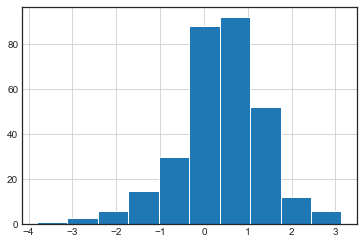

In [156]:
ids['diff_mean'].hist()

In [86]:
ids['Compound Class'].value_counts()

TG              105
PC               62
SM               26
Plasmanyl-PC     25
Plasmenyl-PE     18
LysoPC           14
PI               14
Plasmenyl-PC     12
Plasmanyl-PE     11
PE                6
Cer[NS]           4
CE                4
Alkenyl-DG        2
LysoPE            1
AC                1
Name: Compound Class, dtype: int64

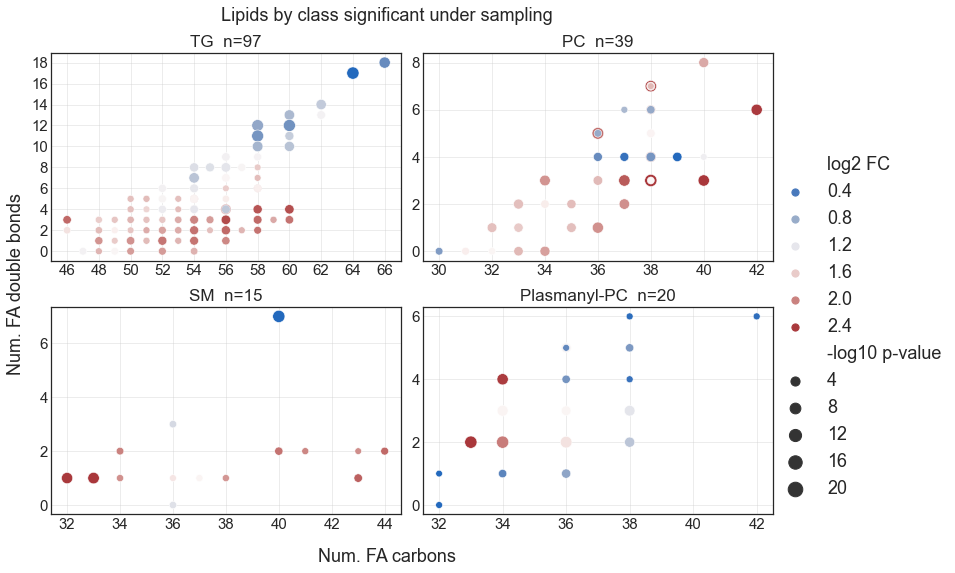

In [230]:
# for i, cls in enumerate(['TG','PC','LysoPC', 'PI', 
#             'PE',  'SM',
#             'Plasmanyl-PC', 'Plasmenyl-PC', 'Plasmanyl-PE', 'Plasmenyl-PE']):

fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(11, 8)
lipid_classes = ['TG', 'PC', 'SM', 'Plasmanyl-PC']
for i, cls in enumerate(lipid_classes):
    ax_row, ax_col = divmod(i, 2)
    ax = axs[ax_row][ax_col]
    df = ids.loc[(data['Compound Class'] == cls) & (data[q_samp] < 0.05)]
    max_C, min_C = df['fa_carbons'].max(), df['fa_carbons'].min()
    max_unsat, min_unsat = df['fa_unsat'].max(), df['fa_unsat'].min()
    C_unsat_combos = set(ids.loc[data['Compound Class'] == cls].value_counts(['fa_carbons', 'fa_unsat']).index)
    sns.scatterplot(data=df, x='fa_carbons', y='fa_unsat', 
                    size='-log10 p-value', sizes=(45, 150),
                    hue='log2 FC', palette='vlag',
                    legend=('brief' if i == 3 else False), # len(lipid_classes)-1
                    alpha=1, 
                    ax=ax)
    ax.set_title(f'{cls}  n={len(df)}', fontsize=17)
    ax.set_xticks(np.arange(min_C, max_C+1, 2))
    ax.set_xticklabels(np.arange(min_C, max_C+1, 2), fontsize=15)
    ax.set_yticks(np.arange(min_unsat, max_unsat+1, 2))
    ax.set_yticklabels(np.arange(min_unsat, max_unsat+1, 2), fontsize=15)
    ax.grid(alpha=0.45)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
#     ax.set_background('gray')
#     if i == 1:
#         ax.legend(loc=(1.12, -1), markerscale=1.7, fontsize=16)
fig.legend(loc='lower right', bbox_to_anchor=(1.22, 0.1), markerscale=1.2, fontsize=18)
ax.legend([], [])
fig.suptitle('Lipids by class significant under sampling', fontsize=18)
fig.supylabel('Num. FA double bonds', fontsize=18)
fig.supxlabel('Num. FA carbons', fontsize=18)
fig.set_facecolor('white')
plt.tight_layout()
plt.savefig(r'..\reports\figures\4\lipids_by_class_foldchange_sig_sampling.png', bbox_inches='tight')

In [69]:
ids.loc[data['Compound Class'] == 'TG'].value_counts(['fa_carbons', 'fa_unsat']).iloc[0:30]

fa_carbons  fa_unsat
54          4           3
58          9           3
60          11          3
58          7           3
            11          3
54          5           2
56          4           2
52          6           2
            5           2
            4           2
56          6           2
            8           2
54          7           2
58          6           2
            8           2
54          6           2
58          10          2
62          13          2
60          12          2
64          17          1
54          8           1
55          2           1
            3           1
            4           1
            8           1
56          1           1
            2           1
            3           1
62          14          1
56          5           1
dtype: int64

In [58]:
set(ids.loc[data['Compound Class'] == 'TG'].value_counts(['fa_carbons', 'fa_unsat']).index)

{(46, 0),
 (46, 1),
 (46, 2),
 (46, 3),
 (47, 0),
 (48, 0),
 (48, 1),
 (48, 2),
 (48, 3),
 (49, 0),
 (49, 1),
 (49, 2),
 (49, 3),
 (50, 0),
 (50, 1),
 (50, 2),
 (50, 3),
 (50, 4),
 (50, 5),
 (51, 1),
 (51, 2),
 (51, 3),
 (51, 4),
 (51, 5),
 (52, 0),
 (52, 1),
 (52, 2),
 (52, 3),
 (52, 4),
 (52, 5),
 (52, 6),
 (53, 1),
 (53, 2),
 (53, 3),
 (53, 4),
 (53, 5),
 (54, 0),
 (54, 1),
 (54, 2),
 (54, 3),
 (54, 4),
 (54, 5),
 (54, 6),
 (54, 7),
 (54, 8),
 (55, 2),
 (55, 3),
 (55, 4),
 (55, 8),
 (56, 1),
 (56, 2),
 (56, 3),
 (56, 4),
 (56, 5),
 (56, 6),
 (56, 7),
 (56, 8),
 (56, 9),
 (57, 2),
 (57, 8),
 (58, 2),
 (58, 3),
 (58, 4),
 (58, 6),
 (58, 7),
 (58, 8),
 (58, 9),
 (58, 10),
 (58, 11),
 (58, 12),
 (59, 3),
 (60, 3),
 (60, 4),
 (60, 10),
 (60, 11),
 (60, 12),
 (60, 13),
 (62, 13),
 (62, 14),
 (64, 17),
 (66, 18)}

<AxesSubplot:xlabel='fa_carbons', ylabel='fa_unsat'>

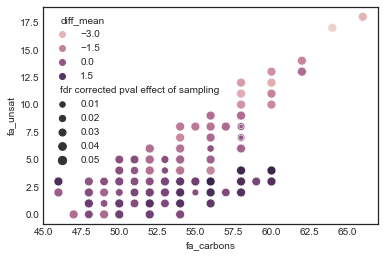

In [29]:
sns.scatterplot(data=ids.loc[ids['Compound Class'] == 'TG'], x='fa_carbons', y='fa_unsat', 
                size=q_samp, sizes=(80, 20),
                hue='diff_mean')

In [ ]:
np.arange()